## Praca domowa 4

#### Autor: Maciej Orsłowski

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
# a
df.loc[(df["Year"] > 2015) & (df["Publisher"] == "Nintendo") & (df["NA_Sales"] < df["EU_Sales"])]\
    .reset_index()\
    .drop("index", axis=1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
1,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
2,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


In [4]:
# b
df.loc[df["Year"] == 2010]\
    .groupby("Genre")\
    [["Global_Sales"]]\
    .agg("sum")\
    .reset_index()\
    .max()

Genre           Strategy
Global_Sales      117.64
dtype: object

In [5]:
# c
genre_agg = df[["Genre", "JP_Sales", "EU_Sales"]]\
    .groupby("Genre")\
    .agg("mean")
genre_agg.loc[genre_agg["JP_Sales"] > genre_agg["EU_Sales"]]\
    .drop("EU_Sales", axis=1)\
    .sort_values("JP_Sales", ascending=False)\
    .reset_index()\
    .rename(columns={"Genre": "Typ Gry", "JP_Sales": "Średnia sprzedaż w Japonii"})

,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

## Oryginalny wykres:
![](assets/images/original.png)

https://covid-19.geohive.ie/

## Poprawiony wykres (ggplot)
![](assets/images/poprawiony.png)

https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/OrslowskiMaciej/raport.html

## Poprawiony wykres (python)

In [6]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

covid_ie_deaths = pd.read_csv("assets/data/covid_deaths_ireland.csv")\
    .dropna()
covid_ie_deaths = covid_ie_deaths.assign(Date=lambda x: pd.to_datetime(x["Date"]))

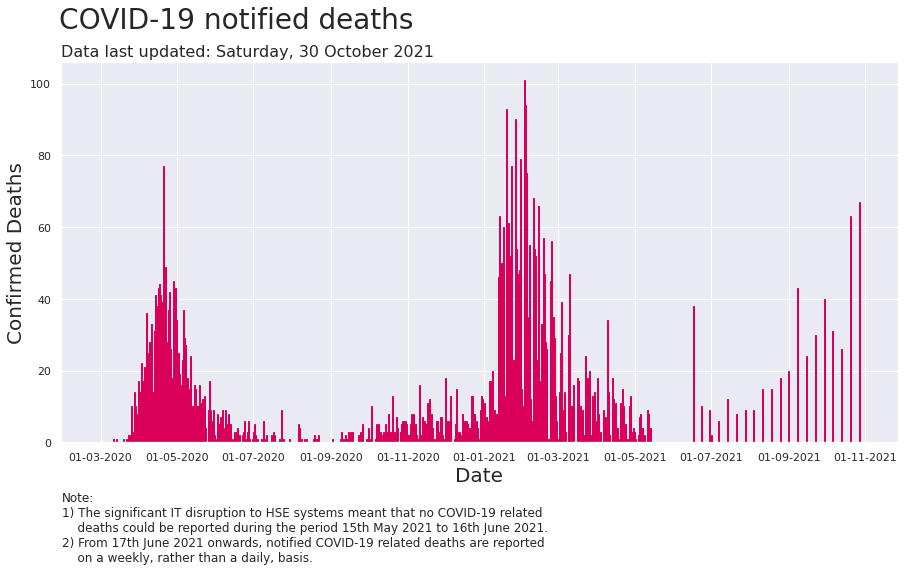

In [7]:
sns.set(rc={'figure.figsize': (15,7)})
plt.bar("Date", "ConfirmedCovidDeaths", data=covid_ie_deaths, edgecolor="#DA0059", color="#DA0059")
plt.suptitle("COVID-19 notified deaths", x=0.2875, y=0.99, ha="center", va="top", fontsize=28)
plt.title("Data last updated: Saturday, 30 October 2021", loc="left", fontsize=16)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Confirmed Deaths", fontsize=20)
plt.gca().xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
plt.grid(True, "major")
plt.figtext(x=0.126, y=-0.11, fontsize=12,
            s="Note:\n"
            "1) The significant IT disruption to HSE "
            "systems meant that no COVID-19 related\n    deaths "
            "could be reported during the period 15th May 2021 to "
            "16th June 2021.\n"
            "2) From 17th June 2021 onwards, notified COVID-19 "
            "related deaths are reported\n    on a weekly, "
            "rather than a daily, basis.")
plt.show()

## Różnice
Podstawowym problemem oryginalnego wykresu była jego niska czytelność, spowodowana głównie przez nadmiernie duże punkty, które go zamazywały. Na drugim wykresie zmniejszenie rozmiaru kropek znacznie ułatwiło jego czytanie, jednakże fakt, że oprócz kropek obecne na nim są też linie sprawia, że jedna informacja przekazywana jest na dwa sposoby. Jako, że usunięcie kropek lub linii zmniejszało jego czytelność, doszedłem do wniosku, że rozwiązaniem tego problemu będzie zmiana typu wykresu na kolumnowy. Dzięki temu udało się rozwiązać problem wykresu z ggplot2 jednocześnie zachowując jego dobrą przejrzystość.

Na oryginalnym wykresie było bardzo mało przedziałek na osi X, co poprawiłem na wykresie zrobionym w R. Na wykresie trzecim, tych przedziałek w porównaniu z poprzednim wykresem jest jeszcze więcej, co jeszcze bardziej ułatwia odczytywanie danych. Nieco bardziej subtelną zmianą jest zmiana formatu daty na tej osi na taki, jaki jest najbardziej powszechny w Irlandii.

Ostatnią małą zmianą jest zwiększony rozmiar czcionki na osiach i w tytule względem wykresu z ggplot2. Poza tym, podobnie jak w przypadku drugiego wykresu, uwagi pod wykresem w Pythonie są podzielone na dwa osobne podpunkty, co zwiększa ich przejrzystość względem oryginalnego wykresu.